# NetCDF Tutorial

**Maxime Benoît-Gagné**

This tutorial was given at the meeting of the Numerical Ecology in
Oceanography Laboratory (NEOLab), Université Laval, on April 21, 2023.

This Jupyter notebook is part of the project for_wintertime_users
containing documentation and examples on how to use
the outputs of the default simulation EXP-0 described in
Benoît-Gagné et al. (submitted).

The documentation and examples are available on:

https://github.com/maximebenoitgagne/for_wintertime_users/tree/main.

The original project of Benoît-Gagné et al. (submitted) can be found on:

https://github.com/maximebenoitgagne/wintertime/tree/v1.5.

# Definitions

**NetCDF file for a region**:
A NetCDF file for many latitudes and many longitudes, for example, a NetCDF file for the whole Baffin Bay.

**NetCDF file for a specific location**:
A NetCDF file for only one latitude and one longitude, for example, a NetCDF file for the location of an ice camp.

**Results of Benoît-Gagné et al. (submitted)**:
NetCDF files containing the results of the default simulation of Benoît-Gagné et al. (submitted).
The simulation was adapted to the location of the Qikiqtarjuaq sea ice camp in western Baffin Bay (67.4797&deg;N, -63.7895&deg;E) in 2016 during the Green Edge sea ice camp mission.
The model was run with a spinup of 10 years to stabilise the system.
Use the data of that tenth year.
The dimensions of the data are the depth steps and the time steps.

# What you will learn in this tutorial

* Find the results of Benoît-Gagné et al. (submitted).
* Understand the structure of the results of Benoît-Gagné et al. (submitted).
* Explore the structure of a NetCDF file for a specific location with Panoply.
* Plot a NetCDF file for a specific location with Panoply.
* Read a NetCDF file for a specific location with Python.*
* Export a NetCDF file for a specific location into a comma-separated values (CSV) file with Python.*
* Plot a variable from the results of Benoît-Gagné et al. (submitted) with Python.*
* Find more examples of Python scripts reading the results of Benoît-Gagné et al. (submitted).*

Note: The goals with an asterisk (\*) have the following prerequisites:

* Knowledge of Anaconda.
* Basic knowledge of Python.

# What you will not learn in this tutorial

* Anaconda.
* Python.
* Use a NetCDF file for a specific location when the metadata doesn't contain sufficient information to retrieve the depth steps and the time steps of the file. Actually, the only solution would be to ask someone who knows the answer, for example, the human author of the files.
* Export a NetCDF file for a specific location into a CSV file with Panoply.
* Write a NetCDF file.
* Read a NetCDF file for a specific location in R.
* Use a NetCDF file for a region.

# Installation steps

These installation steps were tested for MacOS X 10.13 (High Sierra).

* Install Panoply (https://www.giss.nasa.gov/tools/panoply/download/).

- Install Anaconda for Python 3 as described on 
  https://datacarpentry.org/python-ecology-lesson/setup.html:
  - Go to https://www.anaconda.com/products/distribution.
  - Click Download.
  - Double-click the graphical installer `.pkg` file.
  - Follow the instructions. Select the default settings.
  - Verify the installation by entering the following command in the Terminal
    (Launchpad icon in the Dock, type Terminal, click Terminal):
```
conda --help
```
 
* Enter the following commands in the Terminal. The creation of the conda environment can take approximately 15 minutes.
```
git clone git@github.com:maximebenoitgagne/for_wintertime_users.git
cd for_wintertime_users/
conda env create -f for_wintertime_users.yml
conda activate for_wintertime_users
jupyter notebook
```

Once the environment for_wintertime_users is created, the Jupyter notebook can be launched simply with:

```
cd for_wintertime_users/
conda activate for_wintertime_users
jupyter notebook
```

# Find the data

The results of Benoît-Gagné et al. (submitted) are available on
https://github.com/maximebenoitgagne/wintertime/tree/v1.5/data/DataS8_output_mitgcm/exp0.
Two relatively small files of these results are also in the
directory `data` of this project.

![Files](figures/files.png)

# Read a NetCDF file with Panoply

Panoply is a graphical user interface (GUI) tool to explore and plot NetCDF files.

Steps

* Click on Panoply.
* Select grid.t001.nc.

![grid.t001.nc](figures/grid.t001.nc.png)

* Select the variable RC.

![RC_01](figures/RC_01.png)

We see that the variable RC in grid.t001.nc contains the values of the 75 depth steps.

* Double-click on RC.

![RC)2](figures/RC_02.png)

* Click Create.

![RC_03](figures/RC_03.png)

* Select tab Array 1.

![RC_04](figures/RC_04.png)

* Check Show cell indices.

![RC_05](figures/RC_05.png)

* Select Format %.6f.

![RC_06](figures/RC_06.png)

We now see explicitely the values of the 75 depth steps.
Note that the vertical grid is irregular.
We have to take that into account if we want to transform units by
$\mathrm{ m^{-3} }$ into units by $\mathrm{ m^{-2} }$.

We will now open another NetCDF file.
We will open rates.0000000000.t001.nc.

* File > Open > rates.0000000000.t001.nc.

![rates](figures/rates.png)

* Select the variable PP.

![PP_01](figures/PP_01.png)

We see that the variable PP is the primary production in $\mathrm{ mmol\ C\ m^{-3}\ s^{-1} }$.
The dimension T is the daily time steps over 10 years (10\*365=3650).
The dimension Zmd000075 is the 75 depth steps.

# Plot a NetCDF file with Panoply

* Double-click on PP.

![PP_02](figures/PP_02.png)

* Check Create a 2D plot using T for X axis and Zmd000075 for Y axis.
* Click Create.

![PP_03](figures/PP_03.png)

Note that the Y axis contains the indices of the depths and not the values of the depths.
The values of the depths are not in the file rates.0000000000.nc.
They are only in the variable RC of grid.t001.nc.

Note also that the depths on the Y axis are in the reverse order.
This is because the first depth index is at the water surface and is
shown at the bottom of the plot.
We would rather show it at the top of the plot.

* Grid > Swap B/T.

![PP_04](figures/PP_04.png)

We now see the primary productivity over 10 years.
We can see the 10 yearly spring blooms.
It worths noting again that the Y axis contains the indices of the depths
from 0 to 74 and not the values of the depths.

To make it clearer, we will show the indices of the depths from 1 to 75
instead of 0 to 74.
In order to do that:

* Y-Axis: Units: Grid Point Index.
* Y-Axis: Ticks: Format %.0f.
* Swap B/T.

![PP_05](figures/PP_05.png)

Verify.

* Select tab Array 1.

![PP_06](figures/PP_06.png)

* Show cell indices.

![PP_07](figures/PP_07.png)

We will retrieve the value of the depth at the depth index 15 using
the variable RC in grid.t001.nc.

![RC_06](figures/RC_06.png)

We see that the value of the depth at the depth index 15 is 25.356 m.

* Select the tab Plot.

![PP_05](figures/PP_05.png)

To make the rows corresponding to each depth clearer:

* Select the tab Array(s).
* Uncheck Interpolate.

![PP_08](figures/PP_08.png)

The fifteenth row, just above the tick 15 on the Y-Axis, corresponds to
a depth of 25.356 m.

We will now make the X-Axis clearer by showing the indices of the time
steps.

* Select the tab Grid.
* X-Axis: Units: Grid Point Index.
* X-Axis: Ticks: Format: %.0f.

![PP_09](figures/PP_09.png)

The X axis is now the index of the day over the 10 years of the spinup.
We want to select only the tenth year.
The indices of the X axis will be 365\*9=3285 (inclusive) to 365\*10=3650 (exclusive).

* X-Axis: Left: 3285.

![PP_10](figures/PP_10.png)

It worths noting that the selection of the tenth year in the Grid tab
affects only the plot in the tab Plot.
It doesn't affect the array in the tab Array 1.
The array in the tab Array 1 will continue to contain the values for the
10 years.

We can improve the precision of the colour bar:

* Select tab Scale.
* Tick Format: %.6f.

![PP_11](figures/PP_11.png)

We can find a specific numeric value in the tab Array 1.

* Select tab Array 1.

![PP_12](figures/PP_12.png)

We can improve the precision.

* Format: %.6f.

![PP_13](figures/PP_13.png)

We now see explicitely the values of the 75\*3650 primary productivities.

Move the horizontal scroll bar to the right to see some values above 0.

![PP_14](figures/PP_14.png)

# Read a NetCDF file with Python

## First, load libraries

In [1]:
import netCDF4
import numpy as np

## Select year

In [2]:
nbyears=10
last_year=np.arange(365*(nbyears-1),365*(nbyears))
last_year.shape

(365,)

In [3]:
for i,v in enumerate(last_year):
    print(i,v)

0 3285
1 3286
2 3287
3 3288
4 3289
5 3290
6 3291
7 3292
8 3293
9 3294
10 3295
11 3296
12 3297
13 3298
14 3299
15 3300
16 3301
17 3302
18 3303
19 3304
20 3305
21 3306
22 3307
23 3308
24 3309
25 3310
26 3311
27 3312
28 3313
29 3314
30 3315
31 3316
32 3317
33 3318
34 3319
35 3320
36 3321
37 3322
38 3323
39 3324
40 3325
41 3326
42 3327
43 3328
44 3329
45 3330
46 3331
47 3332
48 3333
49 3334
50 3335
51 3336
52 3337
53 3338
54 3339
55 3340
56 3341
57 3342
58 3343
59 3344
60 3345
61 3346
62 3347
63 3348
64 3349
65 3350
66 3351
67 3352
68 3353
69 3354
70 3355
71 3356
72 3357
73 3358
74 3359
75 3360
76 3361
77 3362
78 3363
79 3364
80 3365
81 3366
82 3367
83 3368
84 3369
85 3370
86 3371
87 3372
88 3373
89 3374
90 3375
91 3376
92 3377
93 3378
94 3379
95 3380
96 3381
97 3382
98 3383
99 3384
100 3385
101 3386
102 3387
103 3388
104 3389
105 3390
106 3391
107 3392
108 3393
109 3394
110 3395
111 3396
112 3397
113 3398
114 3399
115 3400
116 3401
117 3402
118 3403
119 3404
120 3405
121 3406
122 3407
123

## Grid

See the documentation on the grid of the output of the MITgcm model:
https://darwin3.readthedocs.io/en/latest/getting_started/getting_started.html#grid.

RC is the r coordinate of cell center (in m).

In [4]:
gridfile='data/grid.t001.nc'

In [5]:
ncfile=gridfile
variable='RC'
try:
    # open the netCDF file for reading
    fh=netCDF4.Dataset(ncfile,'r')
except:
    raise IOError("File not found: {}.".format(ncfile))
try:
    # read the data in variable named v
    RC=fh.variables[variable][:]
except:
    raise IOError("Variable {} not found in {}.".format(variable, ncfile))
fh.close()

We switch sign to have positive depths.

In [6]:
# swith sign
RC=-RC
RC.shape

(75,)

In [7]:
for i,v in enumerate(RC):
    print(i,v)

0 0.5061625
1 1.5333449999999997
2 2.5948719999999996
3 3.7013264999999995
4 4.866235
5 6.106664499999999
6 7.443784999999999
7 8.903281
8 10.5154235
9 12.314566000000001
10 14.337813500000001
11 16.6226945
12 19.203892000000003
13 22.109410500000003
14 25.356929
15 28.9512475
16 32.883559500000004
17 37.1327755
18 41.6684945
19 46.454799
20 51.453981
21 56.6295605
22 61.9483055
23 67.381287
24 72.9041905
25 78.4971245
26 84.1441395
27 89.832647
28 95.5528315
29 101.2971055
30 107.0596445
31 112.836004
32 118.622804
33 124.417478
34 130.2180915
35 136.02317200000002
36 141.8316135
37 147.6425875
38 153.4554685
39 159.269784
40 165.08516799999998
41 170.9013685
42 176.718179
43 182.5354395
44 188.35304349999998
45 194.17090699999997
46 199.98896899999997
47 205.80717599999997
48 211.62548949999996
49 217.44388699999996
50 223.26235349999996
51 229.08086549999996
52 234.89940799999997
53 240.71797349999997
54 246.53655399999997
55 252.35515749999996
56 258.17376899999994
57 263.992387999

## Primary productivity

In [8]:
ppfile='data/rates.0000000000.t001.nc'

PP is the primary production (in $\mathrm{ mmol\ C\ m^{-3}\ s^{-1} }$).

In [9]:
ncfile=ppfile
variable='PP'
try:
    # open the netCDF file for reading
    fh=netCDF4.Dataset(ncfile,'r')
except:
    raise IOError("File not found: {}.".format(ncfile))
try:
    # read the data in variable named v
    array2d_idepth_iT_ppfull=fh.variables[variable][:]
except:
    raise IOError("Variable {} not found in {}.".format(variable, ncfile))
fh.close()
array2d_idepth_iT_ppfull.shape

(3650, 75, 1, 1)

In [10]:
array2d_idepth_iT_ppfull=array2d_idepth_iT_ppfull.squeeze()
array2d_idepth_iT_ppfull.shape

(3650, 75)

In [11]:
array2d_idepth_iT_ppfull=array2d_idepth_iT_ppfull.transpose()
array2d_idepth_iT_ppfull.shape

(75, 3650)

In [12]:
array2d_idepth_iT_pp=array2d_idepth_iT_ppfull[:,last_year]
array2d_idepth_iT_pp.shape

(75, 365)

The row is the index of the depth (0-based).
The column is the index of the day of year of the tenth year (0-based).

# Export a NetCDF file into a CSV file with Python

Suppose we want the comma-separated values (CSV) file PP.csv
in a wide form (not data matrix form, a.k.a. tidy form) with 366 columns.
The first column is the depth in m.
The 365 following columns are the days of year.
The first row is the headers.
The 75 following rows are the depths.

```
depth_m,doy_001,doy_002,...,doy_365
0.5061625,...
...
362.9093209999997,...
```

First, load libraries.

In [13]:
import pandas as pd

In [14]:
df_depth=pd.DataFrame({'depth_m':RC})
df_depth

,depth_m
0,0.506162
1,1.533345
2,2.594872
3,3.701326
4,4.866235
...,...
70,339.634738
71,345.453388
72,351.272037
73,357.090687


In [15]:
df_PP_names=['doy_{0:03}'.format(i) for i in range(1,366)]
df_PP_names

['doy_001',
 'doy_002',
 'doy_003',
 'doy_004',
 'doy_005',
 'doy_006',
 'doy_007',
 'doy_008',
 'doy_009',
 'doy_010',
 'doy_011',
 'doy_012',
 'doy_013',
 'doy_014',
 'doy_015',
 'doy_016',
 'doy_017',
 'doy_018',
 'doy_019',
 'doy_020',
 'doy_021',
 'doy_022',
 'doy_023',
 'doy_024',
 'doy_025',
 'doy_026',
 'doy_027',
 'doy_028',
 'doy_029',
 'doy_030',
 'doy_031',
 'doy_032',
 'doy_033',
 'doy_034',
 'doy_035',
 'doy_036',
 'doy_037',
 'doy_038',
 'doy_039',
 'doy_040',
 'doy_041',
 'doy_042',
 'doy_043',
 'doy_044',
 'doy_045',
 'doy_046',
 'doy_047',
 'doy_048',
 'doy_049',
 'doy_050',
 'doy_051',
 'doy_052',
 'doy_053',
 'doy_054',
 'doy_055',
 'doy_056',
 'doy_057',
 'doy_058',
 'doy_059',
 'doy_060',
 'doy_061',
 'doy_062',
 'doy_063',
 'doy_064',
 'doy_065',
 'doy_066',
 'doy_067',
 'doy_068',
 'doy_069',
 'doy_070',
 'doy_071',
 'doy_072',
 'doy_073',
 'doy_074',
 'doy_075',
 'doy_076',
 'doy_077',
 'doy_078',
 'doy_079',
 'doy_080',
 'doy_081',
 'doy_082',
 'doy_083',
 'do

In [16]:
df_PP=pd.DataFrame(array2d_idepth_iT_pp)
df_PP.columns=df_PP_names
df_PP

,doy_001,doy_002,doy_003,doy_004,doy_005,doy_006,doy_007,doy_008,doy_009,doy_010,...,doy_356,doy_357,doy_358,doy_359,doy_360,doy_361,doy_362,doy_363,doy_364,doy_365
0,0.0,0.0,0.0,0.0,0.0,3.003517e-12,9.562626e-12,3.982557e-11,6.567130e-11,6.554848e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,2.746950e-12,9.208227e-12,3.840060e-11,6.336488e-11,6.324807e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.635478e-12,8.835832e-12,3.689539e-11,6.092277e-11,6.081262e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,2.376848e-12,8.455584e-12,3.535327e-11,5.841642e-11,5.831308e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,2.267716e-12,8.068476e-12,3.377870e-11,5.585338e-11,5.575687e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df=pd.concat([df_depth,df_PP],axis='columns')
df

,depth_m,doy_001,doy_002,doy_003,doy_004,doy_005,doy_006,doy_007,doy_008,doy_009,...,doy_356,doy_357,doy_358,doy_359,doy_360,doy_361,doy_362,doy_363,doy_364,doy_365
0,0.506162,0.0,0.0,0.0,0.0,0.0,3.003517e-12,9.562626e-12,3.982557e-11,6.567130e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.533345,0.0,0.0,0.0,0.0,0.0,2.746950e-12,9.208227e-12,3.840060e-11,6.336488e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.594872,0.0,0.0,0.0,0.0,0.0,2.635478e-12,8.835832e-12,3.689539e-11,6.092277e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.701326,0.0,0.0,0.0,0.0,0.0,2.376848e-12,8.455584e-12,3.535327e-11,5.841642e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.866235,0.0,0.0,0.0,0.0,0.0,2.267716e-12,8.068476e-12,3.377870e-11,5.585338e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,339.634738,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,345.453388,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,351.272037,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,357.090687,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
outfile='PP.csv'
df.to_csv(outfile,index=False)

![PP.csv](figures/PP.csv.png)

# Plot a NetCDF file with Python

First, load libraries.

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
plt.close("all")

one_year_for_heatmaps is the coordinates on the X-Axis of the corners
of quadrilaterals of the pcolormesh
(see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html).

In [21]:
one_year_for_heatmaps=np.arange(0,366)

RF_above100 is the coordinates on the Y-Axis of the corners
of quadrilaterals of the pcolormesh.
We decide to show only the top 100 m.

See the documentation on the grid of the output of the MITgcm model:
https://darwin3.readthedocs.io/en/latest/getting_started/getting_started.html#grid.

RF is the r coordinate of cell interface (in m).

In [22]:
gridfile='data/grid.t001.nc'

In [23]:
ncfile=gridfile
variable='RF'
try:
    # open the netCDF file for reading
    fh=netCDF4.Dataset(ncfile,'r')
except:
    raise IOError("File not found: {}.".format(ncfile))
try:
    # read the data in variable named v
    RF=fh.variables[variable][:]
except:
    raise IOError("Variable {} not found in {}.".format(variable, ncfile))
fh.close()

We switch sign to have positive depths.

In [24]:
# swith sign
RF=-RF
RF.shape

(76,)

In [25]:
for i,v in enumerate(RF):
    print(i,v)

0 -0.0
1 1.012325
2 2.0543649999999998
3 3.1353789999999995
4 4.267274
5 5.465196
6 6.748132999999999
7 8.139437
8 9.667124999999999
9 11.363722
10 13.26541
11 15.410217
12 17.835172
13 20.572612
14 23.646209
15 27.067649
16 30.834846
17 34.932272999999995
18 39.33327799999999
19 44.003710999999996
20 48.90588699999999
21 54.00207499999999
22 59.25704599999999
23 64.63956499999999
24 70.123009
25 75.685372
26 81.308877
27 86.979402
28 92.685892
29 98.419771
30 104.17444
31 109.944849
32 115.727159
33 121.518449
34 127.316507
35 133.119676
36 138.926668
37 144.736559
38 150.548616
39 156.362321
40 162.17724700000002
41 167.99308900000003
42 173.80964800000004
43 179.62671000000003
44 185.44416900000004
45 191.26191800000004
46 197.07989600000005
47 202.89804200000006
48 208.71631000000005
49 214.53466900000004
50 220.35310500000003
51 226.17160200000004
52 231.99012900000002
53 237.80868700000002
54 243.62726
55 249.445848
56 255.26446700000002
57 261.083071
58 266.901705
59 272.7203389

In [26]:
RF_above100=np.array(RF[RF<100])

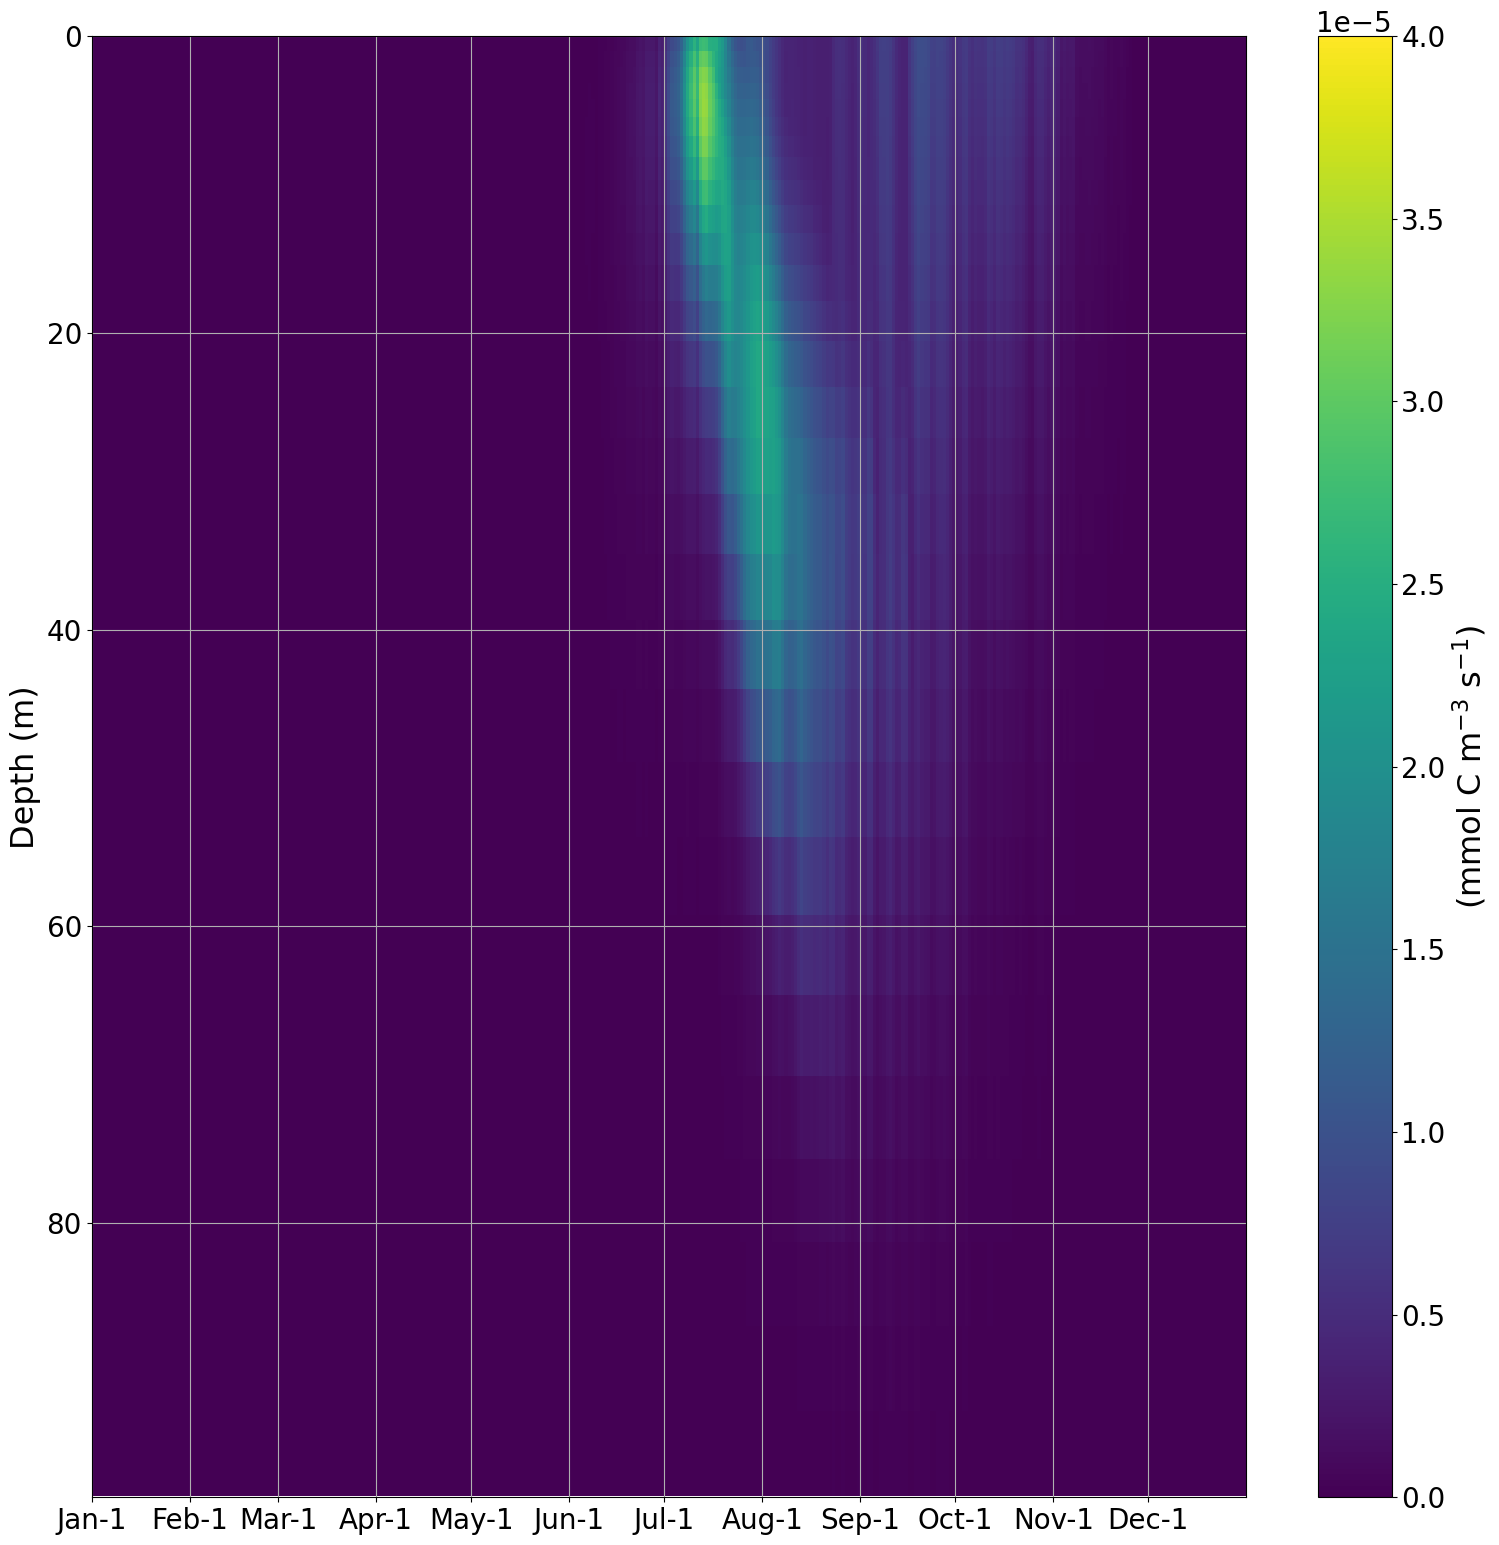

In [27]:
def make_plots(ax):
    locs=np.array([0, 31, 59, 90, 120, 151,
              181, 212, 243, 273, 304, 334])
    labels=('Jan-1','Feb-1','Mar-1','Apr-1','May-1','Jun-1',
            'Jul-1','Aug-1','Sep-1','Oct-1','Nov-1','Dec-1')
    h=ax.pcolormesh(one_year_for_heatmaps,
                    RF_above100,
                    array2d_idepth_iT_pp[0:(RF_above100.size)-1,:],
                    cmap='viridis',
                    vmin=0,
                    vmax=0.00004)
    ax.set_xticklabels([])
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Depth (m)')
    ax.set_ylim(98.5,0)
    ax.grid()
    cbar=plt.colorbar(h)
    cbar.set_label('($\mathrm{ mmol\ C\ m^{-3}\ s^{-1} }$)')
    
    plt.tight_layout()

with plt.style.context('mplstyles/heatmaps.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(16, 16))
    ax=fig.add_subplot(111)
    make_plots(ax)

    # --- SAVE
    plt.savefig('figures/PP.png')
    plt.show()

# More examples in Python

Other examples of Python scripts reading the results of
Benoît-Gagné et al. (submitted) are available on
https://github.com/maximebenoitgagne/wintertime/blob/v1.5/wintertime.ipynb.